In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("ggplot")

In [3]:
data = pd.read_csv("fortune500.csv")

In [4]:
data.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25500 non-null  int64  
 1   Rank                   25500 non-null  int64  
 2   Company                25500 non-null  object 
 3   Revenue (in millions)  25500 non-null  float64
 4   Profit (in millions)   25500 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 996.2+ KB


In [6]:
data.columns = ["year", "rank", "company", "revenue", "profit"]

In [7]:
data.profit.value_counts()

N.A.      369
4          73
3          71
6          67
5.7        67
         ... 
-16.5       1
593.5       1
1883.4      1
1101        1
5908        1
Name: profit, Length: 6977, dtype: int64

In [8]:
na_profit = data.profit == "N.A."
missing_data = data[na_profit]

<AxesSubplot:>

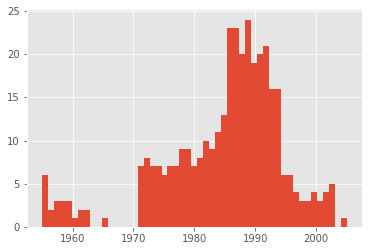

In [9]:
missing_data.year.hist(bins=51, label="Year")

In [10]:
data_complete = data[~na_profit]
data_complete.profit = data_complete.profit.apply(float)

In [11]:
years_revenues_profits = data_complete.loc[: , ["year", "revenue", "profit"]]
grouped = years_revenues_profits.groupby("year")
averages = grouped.mean()

fixed_profits = averages

fixed_profits.profit = fixed_profits.profit * 15

array([[<AxesSubplot:xlabel='Year', ylabel='in Millions'>,
        <AxesSubplot:xlabel='Year', ylabel='in Millions'>]], dtype=object)

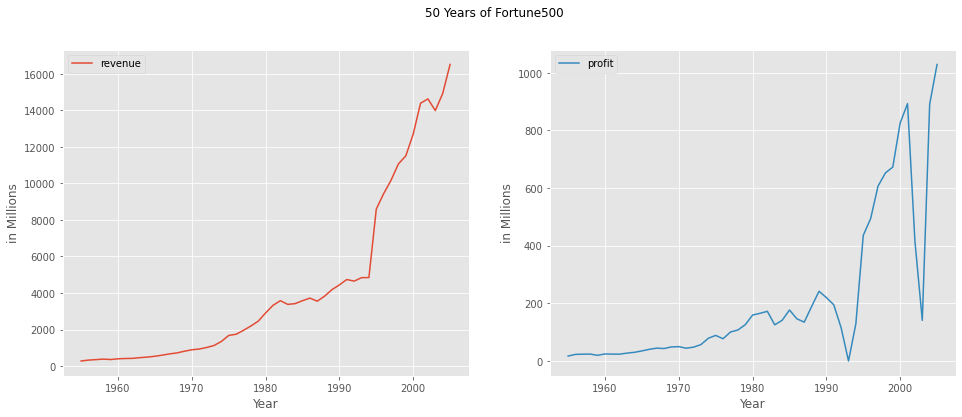

In [15]:
averages.plot(kind="line", y=["revenue", "profit"], subplots=True, layout=(1, 2), xlabel="Year", ylabel="in Millions", title="50 Years of Fortune500", figsize=(16, 6))